# Particle Swarm Optimization(PSO)

## 1. Explanation of PSO

In the foraging model of birds, each individual can be regarded as a particle, then the bird group can be seen as a particle group. If in a D-dimensional target search space, there are $m$ particles that make up a group, where the i-th $(i = 1,2,...m)$ particle position is represented as $X_i = (x_i^1,x_i^2,..., x_i^D)$ . Each particle is a potential solution. Substituting $X_i$ into the objective function can calculate its fitness value and measure its merits according to the size of the adaptation value. The best position experienced by a particle individual is denoted as $P_i = (p_i^1, p_i^2,...,p_i^D)$,  and the best position experienced by all particle of the entire group is denoted as $P_g = (p_g^1,p_g^2,...,p_g^D)$. The speed of the particles is denoted as $V_i=(v_i^1,v_i^2,..,v_i^D)$.

The PSO algorithm uses the following formula to constantly update the location of the particles.

- Speed update formula

 $$v_i^d = \omega v_i^d + c_1r_1(p_i^d-x_i^d) + c_2r_2(p_g^d-x_i^d)  \tag1  $$
 
- Position update formula

 $$x_i^d = x_i^d + \alpha v_i^d \tag2 $$
 
 > $i = 1,2,...,m; d = 1,2,...,D$; 
 
 > $\omega$ is inertia weight;
 
 > $c_1, c_2$ is acceleration constants;
 
 > $r_1,r_2$ is a random number in the range [0,1];
 
 > $\alpha$  is a constraint factor, the purpose is to control the weight of speed.

 ## 2. Procedure and pseudocode of PSO 
 ![PSO流程图](http://on-img.com/chart_image/5a38623be4b0ce9ffe9bd671.png)

### 2.1 pseudocode
---
```python
for each particle i:
    Initialize velocity v and position x for particle i
    Evaluate particle i and set p_best
global_best_particle = min[best_particle]
while not stop:
    for i=1 to N:
        Update the velocity and position of particle i using formula (1)(2)
        Evalueate particle i
        if fit(Xi) < fit(best_particle):
            best_particle = Xi
        if fit(best_particle) < fit(global_best_particle):
            global_best_particle = best_particle  ```
 
 ---
 

##  3.  Practice
### Question1:  minimum value of function $y=x*(x-1)$

global best:  0.52054870444


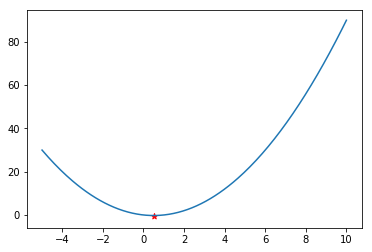

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# 目标函数定义
def func1(x):
    y = x*(x-1)
    return y
    
# 参数初始化
w = 1.0
c1 = 2
c2 = 2
max_iter = 20   # 进化次数  
population_size = 20   # 种群规模
r1 = np.random.random()
r2 = np.random.random()

# 粒子速度和位置的范围
v_max =  1
v_min = -1
x_max =  10
x_min = -10

# 产生初始粒子和速度
x = 10 * np.random.uniform(-1,1,population_size)
v = np.random.uniform(-1,1,population_size)

fitness = func1(x)             # 计算适应度
i = np.argmin(fitness)      # 找最好的个体
particle_best = x         # 记录个体最优位置
global_best = x[i]     # 记录群体最优位置
fitness_particle_best = fitness        # 个体最佳适应度值
fitness_global_best = fitness[i]      # 全局最佳适应度值



def update_position(x, v):
    new_x = x +  alpha * v
    return new_x

def update_velocity(x, v, particle_best, global_best):
    new_v = w * v + c1 * r1 * (particle_best - x) + c2 * r2 * (global_best - x)
    return new_v

# 迭代寻优
iter = 0
record = np.zeros(max_iter)
total_global_best = np.zeros(max_iter)
while iter < max_iter:
    
    # 速度更新 
    v = update_velocity(x, v, particle_best, global_best)
    
    # 位置更新
    x = update_position(x, v)

    # 自适应变异
    p = np.random.random()             # 随机生成一个0~1内的数
    if p > 0.8:                          # 如果这个数落在变异概率区间内，则进行变异处理
        k = np.random.randint(0,2)     # 在[0,2)之间随机选一个整数
        x[k] = np.random.random()  # 在选定的位置进行变异 
    
    # 计算适应度值
    fitness = func1(x)
    
    
    # 个体最优位置更新
    index = fitness < fitness_particle_best
    fitness_particle_best[index] = fitness[index]
    particle_best[index] = x[index]

    # 群体最优更新
    j = np.argmin(fitness)
    if fitness[j] < fitness_global_best:
        global_best = x[j]
        fitness_global_best = fitness[j]

    record[iter] = fitness_global_best # 记录群体最优位置的变化   
    iter = iter + 1

#绘图
print("global best: ", global_best)
X = np.linspace(-5,10,200)
Y = func1(X)
y = func1(global_best)
plt.figure()
plt.plot(X,Y)
plt.scatter(global_best, y, c="r", marker="*")
plt.show() 

### Question2:  minimum value of function $z = x^2 + y ^2$

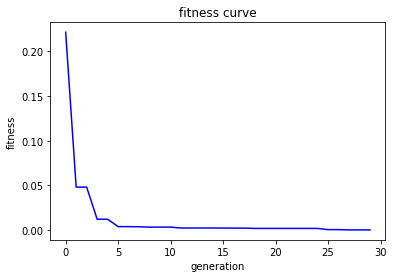

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# 目标函数定义
def func2(x,y):
    z = x**2 + y**2 
    return z
    
# 参数初始化
w = 1.0
c1 = 2
c2 = 2
alpha = 0.5
max_iter = 30   # 进化次数  
population_size = 20   # 种群规模
r1 = np.random.random()
r2 = np.random.random()

# 粒子速度和位置的范围
v_max =  1
v_min = -1
x_max =  5
x_min = -5

# 产生初始粒子和速度
x = 5 * np.random.uniform(-1,1,(2,population_size))
v = np.random.uniform(-1,1,(2,population_size))
fitness = func2(x[0],x[1])             # 计算适应度
i = np.argmin(fitness)      # 找最好的个体
particle_best = x         # 记录个体最优位置
global_best = x[:,i]     # 记录群体最优位置
fitness_particle_best = fitness        # 个体最佳适应度值
fitness_global_best = fitness[i]      # 全局最佳适应度值

def update_position(x, v):
    new_x = x +  alpha * v
    new_x[new_x > x_max] = x_max  # 限制位置
    new_x[new_x < x_min] = x_min
    return new_x

def update_velocity(x, v, global_best):
    new_v = w * v + c1 * r1 * (particle_best - pop) + c2 * r2 * (zbest.reshape(2,1) - pop)
    new_v[new_v > v_max] = v_max     # 限制速度
    new_v[new_v < v_min] = v_min
    return new_v


# 迭代寻优
iter = 0
record = np.zeros(max_iter)
while iter < max_iter:
    
    # 速度更新 
    v = w * v + c1 * r1 * (particle_best - x) + c2 * r2 * (global_best.reshape(2,1) - x)
    v[v > v_max] = v_max     # 限制速度
    v[v < v_min] = v_min
    
    # 位置更新
    x = x + 0.5 * v;
    x[x > x_max] = x_max  # 限制位置
    x[x < x_min] = x_min

    # 计算适应度值
    fitness = func2(x[0],x[1])
    
    # 个体最优位置更新
    index = fitness < fitness_particle_best
    fitness_particle_best[index] = fitness[index]
    particle_best[:,index] = x[:,index]

    # 群体最优更新
    j = np.argmin(fitness)
    if fitness[j] < fitness_global_best:
        global_best = x[:,j]
        fitness_global_best = fitness[j]

    record[iter] = fitness_global_best # 记录群体最优位置的变化   
    
    iter = iter + 1

# 结果分析
plt.plot(record,'b-')
plt.xlabel('generation')  
plt.ylabel('fitness')  
plt.title('fitness curve')  
plt.show()

global best position: x = -0.0131022748353 , y = 0.00316137584197


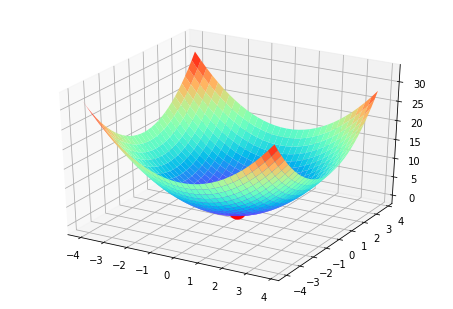

In [89]:
# plot the function
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X,Y)    # x-y 平面的网格
Z = func2(X, Y)

print("global best position: x =", global_best[0], ", y =",global_best[1])
z = func2(global_best[0],global_best[1])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(global_best[0],global_best[1],z,s=300,c='r')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))

plt.show()